### AHS 2019 dataset volume reduction

In [1]:
#USE venv/ python 3.10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./AHS/ahs2019n FLAT.csv')

In [3]:
string_to_num = {
    "'-9'": -9,
    "'-6'": -6,
    "'1'": 1,
    "'2'": 2,
    "'3'": 3,
    "'4'": 4,
    "'5'": 5,
    "'6'": 6,
    "'7'": 7,
    "'8'": 8,
    "'9'": 9,
    "'01'": 1,
    "'02'": 2,
    "'03'": 3,
    "'04'": 4,
    "'05'": 5,
    "'06'": 6,
    "'07'": 7,
    "'08'": 8,
    "'09'": 9,
}

In [4]:
len(data.columns)
file = open('columns.txt', 'w')
for col in data.columns:
    file.write(f'{col}\n')
file.close()

In [5]:
final_dataframe = data[[
    'CONTROL',
    'CONDO',
    'YRBUILT',
    'STORIES',
    'FOUNDTYPE',
    'TOTROOMS',
    'BEDROOMS',
    'BATHROOMS',
    'UNITSIZE',
    'LOTSIZE',
    'PORCH',
    'FIREPLACE',
    'HEATTYPE',
    'HOTWATER',
    'WASHER',
    'DRYER',
    'KITCHSINK',
    'FRIDGE',
    'COOKTYPE',
    'DISHWASH',
    'LANDLINE',
    'CELLPHONE',
    'SOLAR',
    'WATSOURCE',
    'SEWTYPE',
    'NOWIRE',
    # 'PLUGS',
    'WALLCRACK',
    'FLOORHOLE',
    'ROACH',
    'RODENT',
    'NOWATFREQ',
    'LEAKI',
    'LEAKO',
    'ROOFHOLE',
    'WINBARS',
    'WALLSLOPE',
    'WALLSIDE',
    'MOLDKITCH',
    'MOLDBATH',
    'MOLDBEDRM',
    'MOLDLROOM',
    'MOLDBASEM',
    'MOLDOTHER',
    'HINCP',
    'MORTAMT',
    'RENT',
    'YRBUILT',
    # 'DWNPAYPCT',
    'HOWBUY',
    'NEARABAND',
    'RATINGNH',
    'RATINGHS',
    'MARKETVAL',
    ]][data['INTSTATUS']== "'1'"]

In [6]:
final_dataframe = final_dataframe[final_dataframe.MARKETVAL>0]

In [7]:
final_dataframe.describe()

,YRBUILT,STORIES,TOTROOMS,BEDROOMS,CELLPHONE,HINCP,MORTAMT,RENT,YRBUILT,RATINGNH,RATINGHS,MARKETVAL
count,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.0,32972.000000,32972.000000,32972.000000,3.297200e+04
mean,1972.037001,1.922965,6.432124,3.207358,1.378442,1.074233e+05,813.751031,-6.0,1972.037001,7.831099,8.003003,3.710507e+05
std,25.928880,0.972091,1.594221,0.892976,2.351222,1.101804e+05,1892.168815,0.0,25.928880,3.784280,3.745500,4.784807e+05
min,1919.000000,1.000000,1.000000,0.000000,-9.000000,-5.000000e+03,-5376.000000,-6.0,1919.000000,-9.000000,-9.000000,1.000000e+03
25%,1950.000000,1.000000,5.000000,3.000000,1.000000,4.000000e+04,-6.000000,-6.0,1950.000000,8.000000,8.000000,1.489990e+05
50%,1970.000000,2.000000,6.000000,3.000000,2.000000,7.900000e+04,480.000000,-6.0,1970.000000,9.000000,9.000000,2.620850e+05
75%,1990.000000,3.000000,7.000000,4.000000,2.000000,1.350000e+05,1187.000000,-6.0,1990.000000,10.000000,10.000000,4.400422e+05
max,2019.000000,7.000000,13.000000,5.000000,9.000000,2.355400e+06,99998.000000,-6.0,2019.000000,10.000000,10.000000,9.999998e+06


In [8]:
set(final_dataframe.LOTSIZE)
# len(final_dataframe[final_dataframe.UNITSIZE == "'-9'"])

{"'-6'", "'1'", "'2'", "'3'", "'4'", "'5'", "'6'", "'7'"}

In [9]:
# encode using https://pbpython.com/categorical-encoding.html 

final_dataframe.dtypes
final_dataframe['more_3_bathrooms'] = np.where(final_dataframe["BATHROOMS"].str.replace(r'\'', '').astype(int) == 6, 1, 0)
final_dataframe['less_1_bathrooms'] = np.where(final_dataframe["BATHROOMS"].str.replace(r'\'', '').astype(int) > 6, 1, 0)
bathrooms_dict = {
    "'01'": 1,
    "'02'": 1.5,
    "'03'": 2,
    "'04'": 2.5,
    "'05'": 3,
    "'06'": 3,
    "'08'": 0,
    "'09'": 0,
    "'11'": 0,
    "'12'": 0,
    "'13'": 0
}

unitsize_dict = {
    "'1'": 'lt_500',
    "'2'": '500_to_749',
    "'3'": '750_to_999',
    "'4'": '1000_to_1499',
    "'5'": '1500_to_1999',
    "'6'": '2000_to_2499',
    "'7'": '2500_to_2999',
    "'8'": '3000_to_3999',
    "'9'": '4000 or more',
    "'-9'": 'not_reported'
 }

cleanup_dict = {
    'BATHROOMS': bathrooms_dict ,
    'UNITSIZE': unitsize_dict,
    'LOTSIZE': string_to_num,
}
final_dataframe = final_dataframe.replace(cleanup_dict)


/var/folders/1q/0q9ylg052tg7vdc2gvn7dnmw0000gp/T/ipykernel_60190/1596019005.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  final_dataframe['more_3_bathrooms'] = np.where(final_dataframe["BATHROOMS"].str.replace(r'\'', '').astype(int) == 6, 1, 0)
/var/folders/1q/0q9ylg052tg7vdc2gvn7dnmw0000gp/T/ipykernel_60190/1596019005.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  final_dataframe['less_1_bathrooms'] = np.where(final_dataframe["BATHROOMS"].str.replace(r'\'', '').astype(int) > 6, 1, 0)


In [10]:
final_dataframe = pd.get_dummies(final_dataframe, columns=['UNITSIZE'], prefix=['square_footage'])

In [11]:
final_dataframe.describe()
set(final_dataframe.square_footage_lt_500)

{0, 1}

In [12]:
final_dataframe.describe()

,YRBUILT,STORIES,TOTROOMS,BEDROOMS,BATHROOMS,LOTSIZE,CELLPHONE,HINCP,MORTAMT,RENT,...,square_footage_1000_to_1499,square_footage_1500_to_1999,square_footage_2000_to_2499,square_footage_2500_to_2999,square_footage_3000_to_3999,square_footage_4000 or more,square_footage_500_to_749,square_footage_750_to_999,square_footage_lt_500,square_footage_not_reported
count,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.0,...,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,1972.037001,1.922965,6.432124,3.207358,2.079689,2.153585,1.378442,1.074233e+05,813.751031,-6.0,...,0.223250,0.237141,0.168780,0.097689,0.095687,0.048920,0.016044,0.055653,0.006430,0.050406
std,25.928880,0.972091,1.594221,0.892976,0.645461,2.966456,2.351222,1.101804e+05,1892.168815,0.0,...,0.416431,0.425336,0.374563,0.296898,0.294166,0.215705,0.125646,0.229254,0.079928,0.218785
min,1919.000000,1.000000,1.000000,0.000000,0.000000,-6.000000,-9.000000,-5.000000e+03,-5376.000000,-6.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.000000,1.000000,5.000000,3.000000,1.500000,2.000000,1.000000,4.000000e+04,-6.000000,-6.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,2.000000,6.000000,3.000000,2.000000,2.000000,2.000000,7.900000e+04,480.000000,-6.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1990.000000,3.000000,7.000000,4.000000,2.500000,4.000000,2.000000,1.350000e+05,1187.000000,-6.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,7.000000,13.000000,5.000000,3.000000,7.000000,9.000000,2.355400e+06,99998.000000,-6.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
set(final_dataframe['square_footage_lt_500'])

{0, 1}

In [14]:
final_dataframe.head()

,CONTROL,CONDO,YRBUILT,STORIES,FOUNDTYPE,TOTROOMS,BEDROOMS,BATHROOMS,LOTSIZE,PORCH,...,square_footage_1000_to_1499,square_footage_1500_to_1999,square_footage_2000_to_2499,square_footage_2500_to_2999,square_footage_3000_to_3999,square_footage_4000 or more,square_footage_500_to_749,square_footage_750_to_999,square_footage_lt_500,square_footage_not_reported
0,'11000001','2',2000,2,'1',8,3,2.5,2,'1',...,0,0,1,0,0,0,0,0,0,0
1,'11000002','2',1970,2,'4',7,3,2.5,7,'1',...,0,0,0,0,1,0,0,0,0,0
3,'11000005','2',1970,1,'4',8,4,3.0,5,'1',...,0,0,1,0,0,0,0,0,0,0
8,'11000013','2',1980,3,'2',7,3,2.5,3,'1',...,0,0,0,0,1,0,0,0,0,0
9,'11000015','2',1950,3,'1',6,3,1.5,1,'1',...,1,0,0,0,0,0,0,0,0,0


In [15]:
set(final_dataframe.LOTSIZE)

{-6, 1, 2, 3, 4, 5, 6, 7}

In [16]:
final_dataframe.CONDO.value_counts()

'2'    30645
'1'     2327
Name: CONDO, dtype: int64

/var/folders/1q/0q9ylg052tg7vdc2gvn7dnmw0000gp/T/ipykernel_60190/920262725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_dataframe.corr())


<AxesSubplot: >

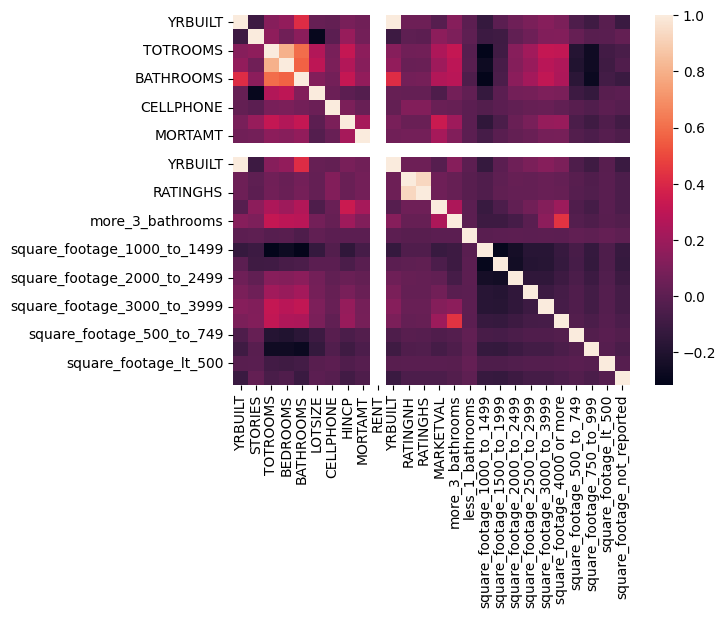

In [17]:
sns.heatmap(final_dataframe.corr())

In [18]:
final_dataframe.select_dtypes(object).columns


Index(['CONTROL', 'CONDO', 'FOUNDTYPE', 'PORCH', 'FIREPLACE', 'HEATTYPE',
       'HOTWATER', 'WASHER', 'DRYER', 'KITCHSINK', 'FRIDGE', 'COOKTYPE',
       'DISHWASH', 'LANDLINE', 'SOLAR', 'WATSOURCE', 'SEWTYPE', 'NOWIRE',
       'WALLCRACK', 'FLOORHOLE', 'ROACH', 'RODENT', 'NOWATFREQ', 'LEAKI',
       'LEAKO', 'ROOFHOLE', 'WINBARS', 'WALLSLOPE', 'WALLSIDE', 'MOLDKITCH',
       'MOLDBATH', 'MOLDBEDRM', 'MOLDLROOM', 'MOLDBASEM', 'MOLDOTHER',
       'HOWBUY', 'NEARABAND'],
      dtype='object')

In [19]:
set(final_dataframe.NEARABAND)

{"'-9'", "'1'", "'2'", "'3'", "'4'"}

In [20]:
condo_dict = {
    "'1'": 1, # condominium
    "'2'": 0, # no condominium
}

porch_dict = {
    "'1'": 1, # porch
    "'2'": 0, # no porch
}

washer_dict = {
    "'1'": 1, # washer
    "'2'": 0, # no washer
}

dryer_dict = {
    "'1'": 1, # dryer
    "'2'": 1, # dryer
    "'3'": 1, # dryer
    "'4'": 1, # dryer
    "'5'": 0, # no dryer
}

kitchen_sink_dict = {
    "'1'": 1, # sink
    "'2'": 0, # no sink
}

fridge_dict = {
    "'1'": 1, # fridge
    "'2'": 0, # no fridge
}

dishwasher_dict = {
    "'1'": 1, # dishwasher
    "'2'": 0, # no dishwasher
}

cooktype_dict = {
"'1'": 'cooking_stove_or_range',
"'2'": 'burners_no_stove_or_range',
"'3'": 'microwave_oven_only',
"'4'": 'no_kitchen_facilities'
}

fireplace_dict = {
"'1'": 1,
"'2'": 1,
"'3'": 1,
"'4'": 0
}

landline_dict = {
"'-6'": 0,
"'-9'": 0,
"'1'": 1,
"'2'": 0
}

solar_dict = {
    "'1'": 'has_solar',
    "'2'": 'no_has_solar',
    "'-9'": 'not_reported',
}

watsource_dict = {
 "'1'": 'public_or_private_system',
 "'2'": 'individual_well',
 "'3'": 'other'
}

heattype_dict = {
"'01'": 'warm-air_furnace',
"'02'": 'steam_or_hot_water_system',
"'03'": 'electric_heat_pump',
"'04'": 'built-in_electric_units',
"'05'": 'floor,_wall,_or_other_built-in_hot-air_units_without_ducts',
"'06'": 'room_heaters_with_flue',
"'07'": 'room_heaters_without_flue',
"'08'": 'portable_electric_heaters',
"'09'": 'stoves',
"'10'": 'fireplaces_with_inserts',
"'11'": 'fireplaces_without_inserts',
"'14'": 'cooking_stove',
"'12'": 'other',
"'13'": 'none',
"'14'": 'none',
}

foundtype_dict = {
"'1'": 'basement_under_all_of_house',
"'2'": 'basement_under_part_of_house',
"'3'": 'crawl_space',
"'4'": 'concrete_slab',
"'5'": 'mobile_home_set_on_masonry_foundation',
"'6'": 'mobile_home_resting_on_concrete_pad',
"'7'": 'mobile_home_up_on_blocks,_but_not_on_concrete_pad',
"'9'": 'mobile_home_foundation_not_reported',
"'8'": 'foundation_setup_in_some_other_way',
}

hotwater_dict = {
"'1'": 'electricity',
"'2'": 'piped_gas',
"'3'": 'bottled_gas',
"'4'": 'fuel_oil',
"'5'": 'solar_energy',
"'6'": 'other',
"'7'": 'no_hot_piped_water',
}

sewtype_dict = {
    "'-9'": 'not_reported',
     "'01'": 'public',
     "'02'": 'septic_tank',
     "'03'": 'pump',
     "'04'": 'above_natural_soil_water',
     "'05'": 'treated_wastedwater',
     "'06'": 'stank_or_cesspool_other',
     "'07'": 'other',
     "'08'": 'other',
     "'09'": 'other',
     "'10'": 'none'
}

nowire_dict = {
    "'1'": 'with_electrical_wiring',
    "'2'": 'exposed_wiring',
    "'3'": 'no_electrical_wiring'
}

wallcrack_dict = {
    "'1'": 1, # wallcrack
    "'2'": 0, # no wallcrack
}

floorhole_dict = {
    "'1'": 1, # floorhole
    "'2'": 0, # no floorhole
}

# no PLUGS, DWNPAYPCT

roach_dict = {
    "'-6'": 'not_reported',
    "'1'": 'roach_last_12_months',
    "'2'": 'roach_last_12_months',
    "'3'": 'roach_last_12_months',
    "'4'": 'roach_last_12_months',
    "'5'": 'no_roach_last_12_months',
}

rodent_dict = {
    "'-6'": 'not_reported',
    "'1'": 'rodent_last_12_months',
    "'2'": 'rodent_last_12_months',
    "'3'": 'rodent_last_12_months',
    "'4'": 'rodent_last_12_months',
    "'5'": 'no_rodent_last_12_months',
}

nowatfreq_dict = {
"'-6'": 'no_wat_reported',
"'-9'": 'no_water_stoppage_reported',
"'0'":  'no_water_stoppage_reported',
"'1'": '1_water_stoppage',
"'2'": '2_water_stoppage',
"'3'": '3_water_stoppage',
"'4'": '4_or_more_water_stoppage',
"'5'": '4_or_more_water_stoppage',
"'6'": '4_or_more_water_stoppage',
"'7'": '4_or_more_water_stoppage',
"'8'": '4_or_more_water_stoppage',
}

leaki_dict = {
    "'1'": 'with_leakage_inside_structure',
    "'2'": 'without_leakage_inside_structure',
    "'-6'": 'not_reported',
}

leako_dict = {
    "'1'": 'with_leakage_outside_structure',
    "'2'": 'without_leakage_outside_structure',
    "'-6'": 'not_reported',
}

roofhole_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": 'hole_in_roof',
"'2'": 'no_hole_in_roof',
}

winbars_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": 'bars_on_windows',
"'2'": 'no_bars_on_windows',
}

wallslope_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": 'sloping_outside_walls',
"'2'": 'no_sloping_outside_walls',
}

wallside_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": 'missing_outside_wall_material',
"'2'": 'not_missing_outside_wall_material',
}

mold_dict = {
    "'-6'": 'not_reported',
    "'-9'": 'not_reported',
    "'1'": 'with_mold',
    "'2'": 'with_no_mold',
}

howbuy_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": 'already_built',
"'2'": 'sales_agreement',
"'3'": 'contractor',
"'4'": 'built_it_yourself',
"'5'": 'inheritance_or_gift',
}

nearaband_dict = {
"'-6'": 'not_reported',
"'-9'": 'not_reported',
"'1'": '1_building',
"'2'": 'more_1_building',
"'3'": 'none',
"'4'": 'no_buildings',
}

final_dataframe = final_dataframe.replace({
    'CONDO': condo_dict,
    'FOUNDTYPE': foundtype_dict,
    'PORCH': porch_dict,
    'FIREPLACE': fireplace_dict,
    'HEATTYPE': heattype_dict,
    'HOTWATER': hotwater_dict,
    'WASHER': washer_dict,
    'DRYER': dryer_dict,
    'KITCHSINK': kitchen_sink_dict,
    'FRIDGE': fridge_dict,
    'COOKTYPE': cooktype_dict,
    'DISHWASH': dishwasher_dict,
    'LANDLINE': landline_dict,
    'SOLAR': solar_dict,
    'WATSOURCE': watsource_dict,
    'SEWTYPE': sewtype_dict,
    'NOWIRE': nowire_dict,
    'WALLCRACK': wallcrack_dict,
    'FLOORHOLE': floorhole_dict,
    'ROACH': roach_dict,
    'RODENT': rodent_dict,
    'NOWATFREQ': nowatfreq_dict,
    'LEAKI': leaki_dict,
    'LEAKO': leako_dict,
    'ROOFHOLE': roofhole_dict,
    'WALLSLOPE': wallslope_dict,
    'WALLSIDE': wallside_dict,
    'MOLDKITCH': mold_dict,
    'MOLDBATH': mold_dict,
    'MOLDBEDRM': mold_dict,
    'MOLDLROOM': mold_dict,
    'MOLDBASEM': mold_dict,
    'MOLDOTHER': mold_dict,
    'HOWBUY': howbuy_dict,
    'NEARABAND': nearaband_dict,
})

final_dataframe = pd.get_dummies(final_dataframe, columns=[
    'COOKTYPE',
    'SOLAR',
    'WATSOURCE',
    'HEATTYPE',
    'FOUNDTYPE',
    'HOTWATER',
    'SEWTYPE',
    'NOWIRE',
    'WALLCRACK',
    'FLOORHOLE',
    'RODENT',
    'NOWATFREQ',
    'LEAKI',
    'LEAKO',
    'ROOFHOLE',
    'WINBARS',
    'WALLSLOPE',
    'WALLSIDE',
    'MOLDKITCH',
    'MOLDBATH',
    'MOLDBEDRM',
    'MOLDLROOM',
    'MOLDBASEM',
    'MOLDOTHER',
    'HOWBUY',
    'NEARABAND',
    'ROACH'
], prefix=[
    'cook_type',
    'solar',
    'water_source',
    'heat_type',
    'foundation_type',
    'hot_water',
    'sewage_type',
    'no_wire',
    'wall_crack',
    'floor_hole',
    'rodent',
    'no_water_frequency',
    'leak_inside',
    'leak_outside',
    'roof_hole',
    'window_bars',
    'wall_slope',
    'wall_side',
    'mold_kitchen',
    'mold_bathroom',
    'mold_bedroom',
    'mold_living_room',
    'mold_basement',
    'mold_other',
    'how_buy',
    'near_abandoned',
    'roach'
])


In [21]:
final_dataframe.describe()


,CONDO,YRBUILT,STORIES,TOTROOMS,BEDROOMS,BATHROOMS,LOTSIZE,PORCH,FIREPLACE,WASHER,...,how_buy_inheritance_or_gift,how_buy_not_reported,how_buy_sales_agreement,near_abandoned_1_building,near_abandoned_more_1_building,near_abandoned_no_buildings,near_abandoned_none,near_abandoned_not_reported,roach_no_roach_last_12_months,roach_roach_last_12_months
count,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,...,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,0.070575,1972.037001,1.922965,6.432124,3.207358,2.079689,2.153585,0.937947,0.499757,0.971400,...,0.033149,0.035606,0.056988,0.020260,0.018743,0.038002,0.889755,0.033240,0.909105,0.090895
std,0.256118,25.928880,0.972091,1.594221,0.892976,0.645461,2.966456,0.241255,0.500008,0.166682,...,0.179029,0.185308,0.231823,0.140889,0.135619,0.191204,0.313200,0.179266,0.287465,0.287465
min,0.000000,1919.000000,1.000000,1.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1950.000000,1.000000,5.000000,3.000000,1.500000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1970.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1990.000000,3.000000,7.000000,4.000000,2.500000,4.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,2019.000000,7.000000,13.000000,5.000000,3.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
final_dataframe.select_dtypes(object)

,CONTROL
0,'11000001'
1,'11000002'
3,'11000005'
8,'11000013'
9,'11000015'
...,...
63180,'11088937'
63181,'11088940'
63182,'11088941'
63183,'11088943'


<AxesSubplot: >

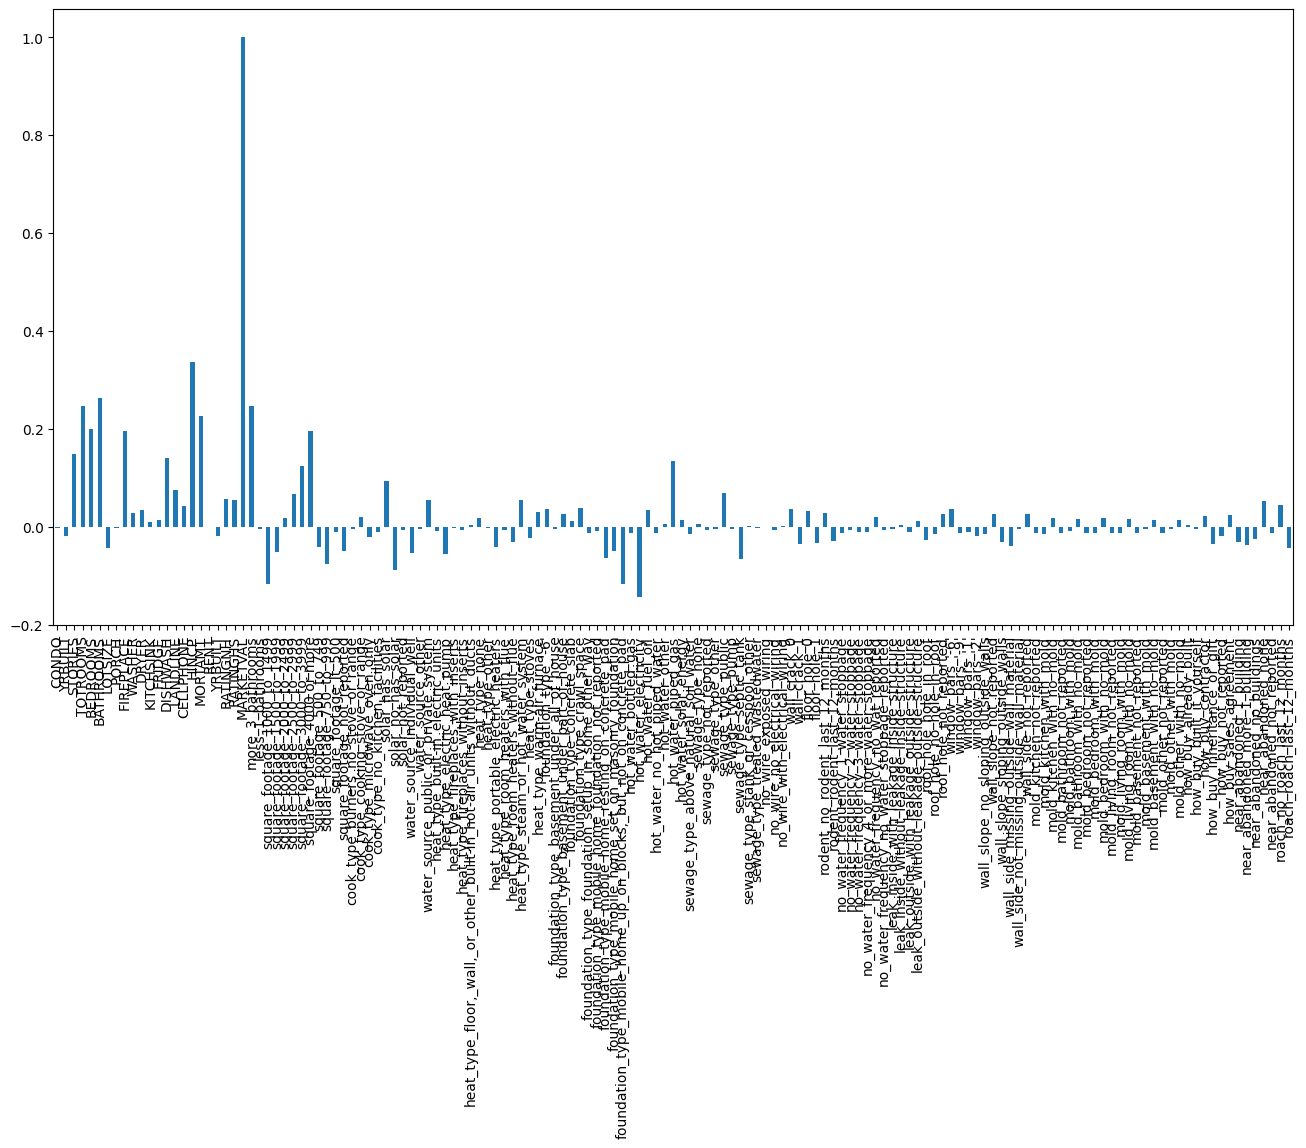

In [23]:
plt.figure(figsize=(16, 8))
final_dataframe.corr(numeric_only=True)['MARKETVAL'].plot(kind='bar')


In [24]:
# final_dataframe.CONTROL = final_dataframe.CONTROL.str.replace(r'[\'\"]', '')
# final_dataframe.CONTROL = final_dataframe.CONTROL.astype(int)
# final_dataframe.CONDO = final_dataframe.CONDO.str.replace(r'[\'\"]', '')
# final_dataframe.CONDO = final_dataframe.CONDO.astype(int)
# set(final_dataframe.FOUNDTYPE)
# final_dataframe.FOUNDTYPE = final_dataframe.FOUNDTYPE.str.replace(r'[\'\"]', '').astype(int)

# set(final_dataframe.BATHROOMS)
# final_dataframe.BATHROOMS = final_dataframe.BATHROOMS.astype(str).str.replace(r'[\'\"]', '').astype(int)
# set(final_dataframe.PORCH)
# final_dataframe.PORCH = final_dataframe.PORCH.str.replace(r'[\'\"]', '').astype(int)
# set(final_dataframe.FIREPLACE)
# final_dataframe.FIREPLACE = final_dataframe.FIREPLACE.str.replace(r'[\'\"]', '').astype(int)
# set(final_dataframe.HEATTYPE)
# final_dataframe.HEATTYPE = final_dataframe.HEATTYPE.str.replace(r'[\'\"]', '').astype(int)

# final_dataframe.HOTWATER = final_dataframe.HOTWATER.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WASHER = final_dataframe.WASHER.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.DRYER = final_dataframe.DRYER.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.KITCHSINK = final_dataframe.KITCHSINK.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.FRIDGE = final_dataframe.FRIDGE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.COOKTYPE = final_dataframe.COOKTYPE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.DISHWASH = final_dataframe.DISHWASH.str.replace(r'[\'\"]', '').astype(int)

# final_dataframe.LANDLINE = final_dataframe.LANDLINE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.SOLAR = final_dataframe.SOLAR.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WATSOURCE = final_dataframe.WATSOURCE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.SEWTYPE = final_dataframe.SEWTYPE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.describe()
# len(final_dataframe.columns)
# final_dataframe.select_dtypes(object).columns
# set(final_dataframe.RODENT)
# final_dataframe.NOWIRE = final_dataframe.NOWIRE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.PLUGS = final_dataframe.PLUGS.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WALLCRACK = final_dataframe.WALLCRACK.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDBATH = final_dataframe.MOLDBATH.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.FLOORHOLE = final_dataframe.FLOORHOLE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.ROACH = final_dataframe.ROACH.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.RODENT = final_dataframe.RODENT.str.replace(r'[\'\"]', '').astype(int)

# final_dataframe.NOWATFREQ = final_dataframe.NOWATFREQ.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.LEAKI = final_dataframe.LEAKI.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.LEAKO = final_dataframe.LEAKO.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.ROOFHOLE = final_dataframe.ROOFHOLE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WINBARS = final_dataframe.WINBARS.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WALLSLOPE = final_dataframe.WALLSLOPE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.WALLSIDE = final_dataframe.WALLSIDE.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDKITCH = final_dataframe.MOLDKITCH.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDBEDRM = final_dataframe.MOLDBEDRM.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDLROOM = final_dataframe.MOLDLROOM.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDBASEM = final_dataframe.MOLDBASEM.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.MOLDOTHER = final_dataframe.MOLDOTHER.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.DWNPAYPCT = final_dataframe.DWNPAYPCT.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.HOWBUY = final_dataframe.HOWBUY.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.NEARABAND = final_dataframe.NEARABAND.str.replace(r'[\'\"]', '').astype(int)
# final_dataframe.dtypes

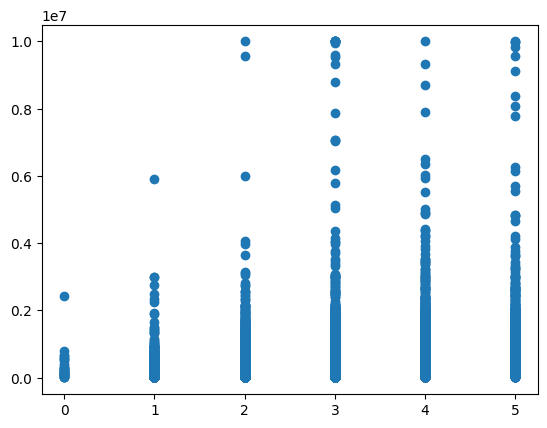

In [25]:
plt.scatter(final_dataframe['BEDROOMS'], final_dataframe['MARKETVAL'])

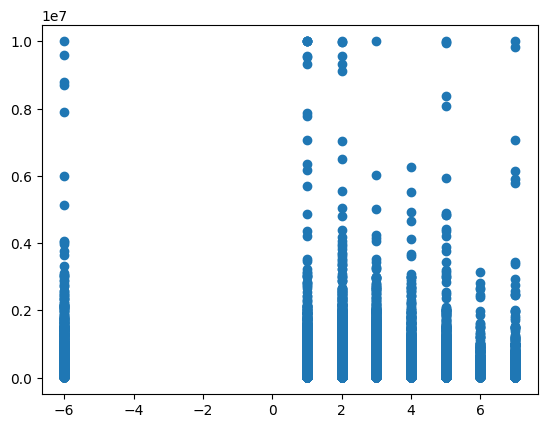

In [26]:
plt.scatter(final_dataframe['LOTSIZE'], final_dataframe['MARKETVAL'])

In [27]:
final_dataframe.to_csv('./AHS_2019_clean.csv')

In [31]:
file = open('final_columns.txt', 'w')
for col in final_dataframe.columns:
    file.write(f'{col}\n')
file.close()